## OpenCV 이미지처리

In [1]:
# ! pip install opencv-python
# ! pip install scikit-image
# ! pip install pillow

### [1] 파이썬 이미지 처리 라이브러리

#### (1) Matplotlib
Matplotlib은 파이썬에서 데이터 시각화를 위한 라이브러리로, plt.plot()을 사용해 그래프를 그리고 plt.imshow()로 이미지를 표시할 수 있다. <br>
다양한 스타일과 색상을 지원하며, plt.xlabel(), plt.ylabel(), plt.title() 등을 활용해 그래프를 쉽게 꾸밀 수 있다.

Image Shape: (512, 512, 3)
<class 'numpy.ndarray'>


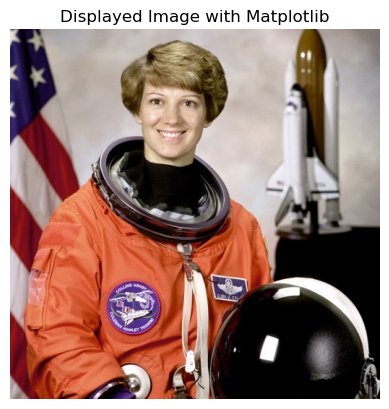

In [8]:
import matplotlib.pyplot as plt

# 이미지 읽기 (Matplotlib의 imread 사용)
image = plt.imread("image.jpg")     # image.jpg 파일을 읽어 NumPy 배열로 변환

# 이미지 정보 출력
print("Image Shape:", image.shape)  # (Height,Width,ColorDepth)  , ColrDepth=Channel(채널)
print(type(image))

# Matplotlib을 사용하여 이미지 출력
plt.imshow(image)
plt.axis('off')   # 축 제거
plt.title("Displayed Image with Matplotlib") # 제목
plt.show()

#### (2) PIL(Python Imaging Library)
PIL은 파이썬 인터프리터에 다양한 이미지 파일 형식을 지원하고 강력한 이미지 처리와 
그래픽 기능을 제공하는 자유-오픈 소스 소프트웨어 라이브러리이다

In [13]:
from PIL import Image

# 이미지 파일 읽기 
image = Image.open('image.jpg')

print(type(image))

# 이미지 정보 출력
print("Image Format:", image.format)  # 이미지 포맷 (JPEG, PNG 등)
print("Image Size:", image.size)  # (가로, 세로)
print("Image Mode:", image.mode)  # RGB, RGBA, Grayscale 등

# 이미지 출력
image.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Image Format: JPEG
Image Size: (512, 512)
Image Mode: RGB


#### (3) scikit-image
Python 프로그래밍 언어 용 오픈 소스 이미지 처리 라이브러리이다. 여기에는 세분화, 기하학적 변형, 색 공간 조작,
분석, 필터링, 형태학, 형상 감지 등의 알고리즘이 포함된다. 이것은 파이썬 수치 및 과학 라이브러리 인 NumPy 및 
SciPy와 상호 운용되도록 설계되었다.

<class 'numpy.ndarray'> (512, 512, 3)


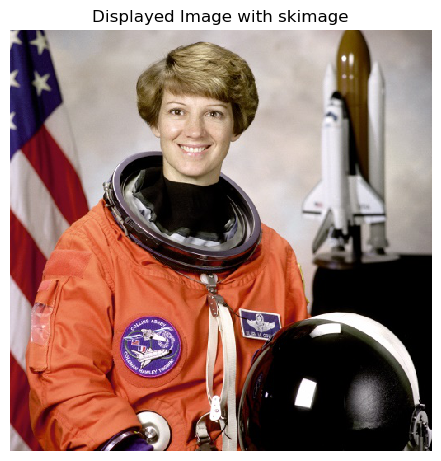

In [17]:
import matplotlib.pyplot as plt
from skimage import io

sk_image = io.imread('image.jpg')
print(type(sk_image),sk_image.shape)
io.imshow(sk_image)

# 출력은 matplotlib 사용
plt.axis("off")  # 축 제거
plt.title("Displayed Image with skimage") 
plt.show()  

### [2] OpenCV 이미지 처리
OpenCV는 Computer Vision 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 Open Library이다.<br>
OpenCV는 영상처리, 3D 구성, 추적, 기계학습, 인식 그리고 딥러닝까지 다양한 기능이 아주 많이 있다.
https://namu.wiki/w/OpenCV

* OpenCV는 원본 RGB 이미지를 BGR 형태의 넘파이 배열로 반환한다  
* OpenCV의 imwrite()를 이용한다면 BGR 형태의 이미지 배열을 파일에 기록할 때 다시 RGB형태로 변환하므로 사용자는 RGB->BGR->RGB 변환에 신경쓰지 않아도 된다(데이터 조작 시에 주의) 

In [19]:
import cv2
cv2.__version__

'4.11.0'

In [46]:
# 이미지 읽기
cv_image = cv2.imread('image.jpg')

# 이미지 출력
cv2.imshow("OpenCV image",cv_image)

# 키 입력 대기
cv2.waitKey()

# 모든 창 닫기
cv2.destroyAllWindows()

In [40]:
print(type(cv_image))   # ndarray
print(cv_image.shape)
cv_image[:,:,0]   # Blue     # sk_image[:,:,2] 와 같은 값

<class 'numpy.ndarray'>
(512, 512, 3)


array([[155, 116,  86, ..., 112, 111, 110],
       [176, 150, 130, ..., 111, 109, 107],
       [195, 183, 171, ..., 112, 110, 107],
       ...,
       [175, 175, 171, ...,   0,   0,   3],
       [174, 174, 168, ...,   0,   6,   2],
       [172, 172, 166, ...,   0,   0,   2]], dtype=uint8)

In [41]:
sk_image = io.imread('image.jpg')
print(type(sk_image), sk_image.shape)
sk_image[:,:,0] # RED

<class 'numpy.ndarray'> (512, 512, 3)


array([[150, 107,  67, ..., 128, 127, 126],
       [172, 143, 117, ..., 127, 125, 123],
       [196, 182, 167, ..., 128, 126, 123],
       ...,
       [188, 188, 186, ...,   0,   0,   0],
       [188, 188, 183, ...,   0,   5,   0],
       [186, 186, 182, ...,   1,   0,   0]], dtype=uint8)

In [42]:
cv_image[:,:,2]   # RED    # sk_image[:,:,0] 와 같은 값

array([[150, 107,  68, ..., 128, 127, 126],
       [173, 144, 117, ..., 127, 125, 123],
       [198, 184, 169, ..., 128, 126, 123],
       ...,
       [188, 186, 184, ...,   0,   0,   0],
       [188, 187, 183, ...,   0,   5,   0],
       [186, 186, 181, ...,   1,   0,   0]], dtype=uint8)

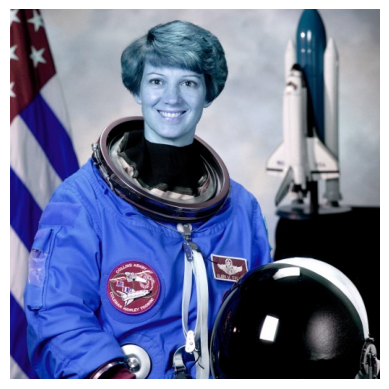

In [48]:
# OpenCV로 읽은 이미지를 matplotlib으로 출력하면 Blue와 Red 색상이 반대로 나온다
plt.imshow(cv_image)  
plt.axis("off")  # 축 제거
plt.show()

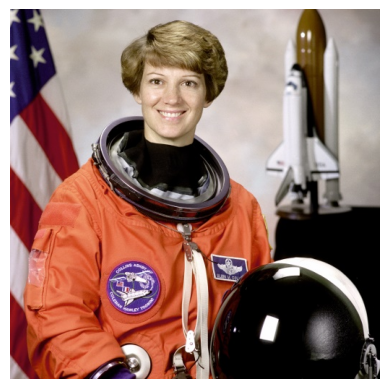

In [50]:
# 색상 변환 : BGR --> RGB
rgb_image = cv2.cvtColor(cv_image,cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변경한다!!
plt.axis("off")  # 축 제거
plt.imshow(rgb_image)
plt.show()

#### (1) 색상변경 : cv2.cvtColor()

In [69]:
img = cv2.imread('image.jpg')
print(img.shape)

# 색상 변경 : gray
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray_img.shape)

cv2.imwrite('gray_image.jpg',gray_img)
cv2.imshow('gray_image',gray_img)
# cv2.imshow('origin_image',img)

cv2.waitKey()
cv2.destroyAllWindows()    
print(cv2.COLOR_BGR2GRAY)   # 6

(512, 512, 3)
(512, 512)
6


In [62]:
# 색상 변경 : hsv, hue(색조),saturation(채도),Value(명도)
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

cv2.imwrite('hsv_image.jpg',hsv_img)
cv2.imshow('hsv_iamge',hsv_img)

cv2.waitKey()
cv2.destroyAllWindows()    
print(cv2.COLOR_BGR2HSV)   # 40

40


In [64]:
# 색상 변경 : YUV , YCbCr
# http://www.ktword.co.kr/test/view/view.php?m_temp1=3693
yuv_img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

cv2.imwrite('yuv_image.jpg',yuv_img)
cv2.imshow('yuv_image',yuv_img)

cv2.waitKey()
cv2.destroyAllWindows()    
print(cv2.COLOR_BGR2YUV)   # 82

82


#### (2) 크기조정 : cv2.resize()

In [72]:
img = cv2.imread('image.jpg')  # (512,512,3)
r,c = img.shape[:2]
print('r:',r,'c:',c)

r: 512 c: 512


In [73]:
# 이미지 2배 확대
# resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
# https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

new_image = cv2.resize(img,(2*r,2*c),interpolation=cv2.INTER_CUBIC)
cv2.imwrite('resize2_image.jpg',new_image)
cv2.imshow('origin_image',img)
cv2.imshow('resize2_image',new_image)
cv2.waitKey()
cv2.destroyAllWindows()   

In [79]:
# 이미지 1/2 축소
new_image = cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
cv2.imwrite('resize1_2_image.jpg',new_image)
cv2.imshow('origin_image',img)
cv2.imshow('resize1_2_image',new_image)
cv2.waitKey()
cv2.destroyAllWindows()   

In [82]:
# 확대(1<fx) or 축소(1>fx) 모두 가능
new_image = cv2.resize(img,None,fx=0.1,fy=0.1) # interpolation=cv2.INTER_LINEAR
cv2.imwrite('resize_linear_image.jpg',new_image)
cv2.imshow('resize_linear__image',new_image)
cv2.waitKey()
cv2.destroyAllWindows()

#### (3) 이미지 자르기 : numpy 배열 슬라이싱 사용

In [88]:
# 이미지 자르기
img = cv2.imread('image.jpg') 
img_crop = img[:200,150:350]
print(img_crop.shape)
cv2.imshow('origin_image',img)
cv2.imshow('crop_image',img_crop)
cv2.waitKey()
cv2.destroyAllWindows()

(200, 200, 3)
